Started on 05/27/25

Looking at a wide exploration of parameter pairs.

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math

import util

FOLDER = "/Users/brendan/Documents/projects/trails_project/data/series/"

SIZE = 10000

# datafile = "/Users/brendan/Documents/projects/trails_project/julia/Paths/data/series/sayak_full_svd|2025-04-29/data.json"
# datafile = "/Users/brendan/Documents/projects/trails_project/julia/Paths/data/series/svd_100|2025-05-06/data.json"

# datafile = "/Users/brendan/Documents/projects/trails_project/julia/Paths/data/series/svd_data|2025-03-06/data.json"

datafiles = [
    "wide_svd|2025-05-25/data.json",
    # "svd_patch_logic|2025-05-27/data.json",
    "svd_001|2025-05-27/data.json",
]

### TODO for 05/28

 - [x] sftp into sayak and pull svd_001 and svd_patch_logic
 - [x] Run this whole shell, compare linear, logistic, and 001 svds to decide which thing to use to run the multi-costs runs.

In [2]:
dfs = [
    util.load_data(FOLDER + datafile) for datafile in datafiles
]
df = pd.concat(dfs)
util.describe(df)

ratios: [100.0]
patch recovery: [0.0002 0.002 0.001]
max costs: [2.0]
boundary conditions: ['PERIODIC' 'SOLID']
num locations: [20 10]
random walker seeds: 8
random locations seeds: 2
patch recovery logic: ['LINEAR']


In [3]:
df.columns

Index(['averageTravelCost', 'averageTravelLength', 'totalImprovement',
       'thresholdImprovement', 'steps', 'paths', 'weightedHeadings',
       'avgHeading', 'avgSquareHeading', 'patches',
       'settings.patchImprovement', 'settings.patchRecovery',
       'settings.maxCost', 'settings.boundaryConditions',
       'settings.numLocations', 'settings.randomSeedWalkers',
       'settings.randomSeedLocations', 'settings.recoveryLogic',
       'settings.improvementLogic', 'ratio'],
      dtype='object')

In [18]:
recoveries = [0.002]
numLocations = [10]
seedLocations = [1, 2]
boundaryConditions = ["PERIODIC"]
steps = [10000]

i = 0
for numLocation in numLocations:
    for seedLocation in seedLocations:
        for boundaryCondition in boundaryConditions:
            for recovery in recoveries:
                for step in steps:
                    _finals = df[
                        (df["steps"] == step) &
                        (df["settings.patchRecovery"] == recovery) &
                        # (df["ratio"] == 100.0) &
                        (df["settings.numLocations"] == numLocation) &
                        (df["settings.randomSeedLocations"] == seedLocation) &
                        (df["settings.boundaryConditions"] == boundaryCondition) &
                        (df["settings.recoveryLogic"] == recoveryLogic)
                    ]

                    U, S, Vh = util.svd(_finals, plot=False)
                    s = S**2/sum(S**2)
    
                    print(i, s[0], " --------- ", step, recoveryLogic, recovery, numLocation, seedLocation, boundaryCondition, S[0])
                    i += 1


0 0.5665641309763385  ---------  10000 SATURATING 0.002 10 1 PERIODIC 70.58633790961431
1 0.8398655524931363  ---------  10000 SATURATING 0.002 10 2 PERIODIC 79.78622493921141


In [38]:
recoveries = [0.002, 0.001, 0.0002]
numLocations = [10, 20]
seedLocations = [1, 2]
boundaryConditions = ["SOLID", "PERIODIC"]
steps = [10000]

i = 0
for numLocation in numLocations:
    for seedLocation in seedLocations:
        for boundaryCondition in boundaryConditions:
            for recovery in recoveries:
                for step in steps:
                    _finals = df[
                        (df["steps"] == step) &
                        (df["settings.patchRecovery"] == recovery) &
                        # (df["ratio"] == 100.0) &
                        (df["settings.numLocations"] == numLocation) &
                        (df["settings.randomSeedLocations"] == seedLocation) &
                        (df["settings.boundaryConditions"] == boundaryCondition) &
                        (df["settings.recoveryLogic"] == "LINEAR")
                    ]
                    U, S, Vh = util.svd(_finals, plot=False)
                    s = S**2/sum(S**2)
    
                    print(i, s[0], " --------- ", step, recovery, numLocation, seedLocation, boundaryCondition, S[0])
                    i += 1


0 0.8500515016744362  ---------  10000 0.002 10 1 SOLID 72.98721606087688
1 0.7620853256568665  ---------  10000 0.001 10 1 SOLID 71.10619438428202
2 0.8429656504938745  ---------  10000 0.0002 10 1 SOLID 70.66456986136576
3 0.5689374592582078  ---------  10000 0.002 10 1 PERIODIC 59.728468659603166
4 0.6828336444191176  ---------  10000 0.001 10 1 PERIODIC 66.95357572204638
5 0.8364393814698168  ---------  10000 0.0002 10 1 PERIODIC 59.625695295605105
6 0.7137886546680573  ---------  10000 0.002 10 2 SOLID 67.77365713091508
7 0.6991021770697854  ---------  10000 0.001 10 2 SOLID 70.27082218006959
8 0.7286588768886201  ---------  10000 0.0002 10 2 SOLID 66.62545648042247
9 0.930471126109495  ---------  10000 0.002 10 2 PERIODIC 70.34984913467679
10 0.9353145728214738  ---------  10000 0.001 10 2 PERIODIC 74.75289839976625
11 0.8539415761553765  ---------  10000 0.0002 10 2 PERIODIC 68.4140970162631
12 0.7908300676563987  ---------  10000 0.002 20 1 SOLID 71.39477481674216
13 0.66451211

In [39]:
recoveries = [0.002, 0.001, 0.0002]
numLocations = [10, 20]
seedLocations = [1, 2]
boundaryConditions = ["SOLID", "PERIODIC"]

i = 0
for numLocation in numLocations:
    for seedLocation in seedLocations:
        for boundaryCondition in boundaryConditions:
            for recovery in recoveries:
                _finals = df[
                    (df["steps"] == 10000) &
                    (df["settings.patchRecovery"] == recovery) &
                    # (df["ratio"] == 100.0) &
                    (df["settings.numLocations"] == numLocation) &
                    (df["settings.randomSeedLocations"] == seedLocation) &
                    (df["settings.boundaryConditions"] == boundaryCondition)
                ]
                U, S, Vh = util.svd(_finals, plot=False)
                s = S**2/sum(S**2)

                print(i, s[0], " --------- ", recovery, numLocation, seedLocation, boundaryCondition, S[0])
                i += 1


0 0.7046278397174911  ---------  0.002 10 1 SOLID 128.7849994500692
1 0.7620853256568665  ---------  0.001 10 1 SOLID 71.10619438428202
2 0.8429656504938745  ---------  0.0002 10 1 SOLID 70.66456986136576
3 0.5586754779908754  ---------  0.002 10 1 PERIODIC 114.19168656528218
4 0.6828336444191176  ---------  0.001 10 1 PERIODIC 66.95357572204638
5 0.8364393814698168  ---------  0.0002 10 1 PERIODIC 59.625695295605105
6 0.6192127353888515  ---------  0.002 10 2 SOLID 122.94725398913428
7 0.6991021770697854  ---------  0.001 10 2 SOLID 70.27082218006959
8 0.7286588768886201  ---------  0.0002 10 2 SOLID 66.62545648042247
9 0.8604144533448791  ---------  0.002 10 2 PERIODIC 132.13508936150686
10 0.9353145728214738  ---------  0.001 10 2 PERIODIC 74.75289839976625
11 0.8539415761553765  ---------  0.0002 10 2 PERIODIC 68.4140970162631
12 0.7908300676563987  ---------  0.002 20 1 SOLID 71.39477481674216
13 0.6645121177654916  ---------  0.001 20 1 SOLID 67.67762123955254
14 0.67558110632837

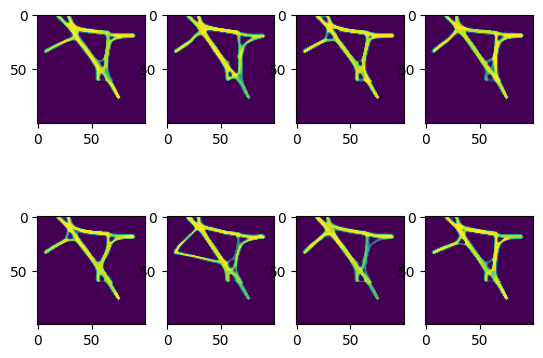

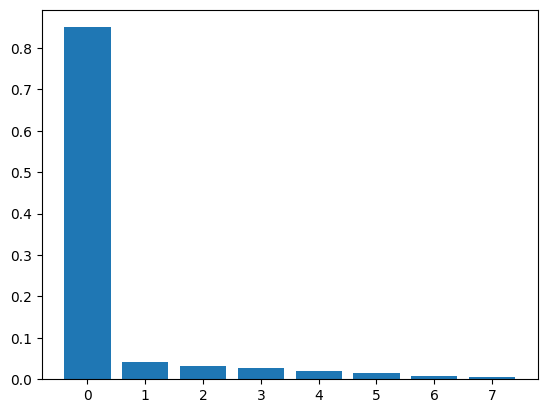

0 0.8500515016744362  ---------  0.002 10 1 SOLID 72.98721606087688


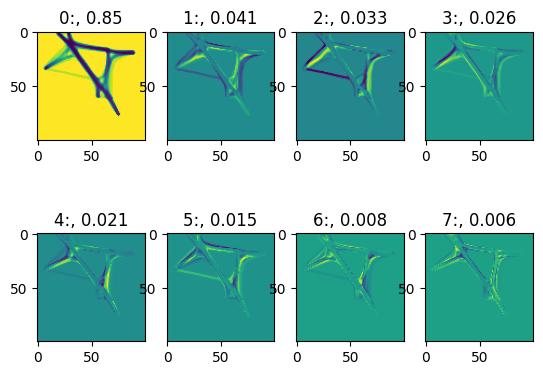

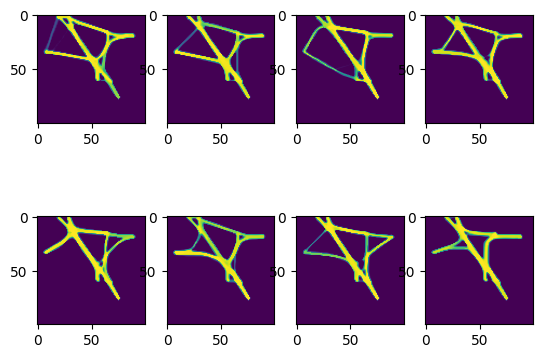

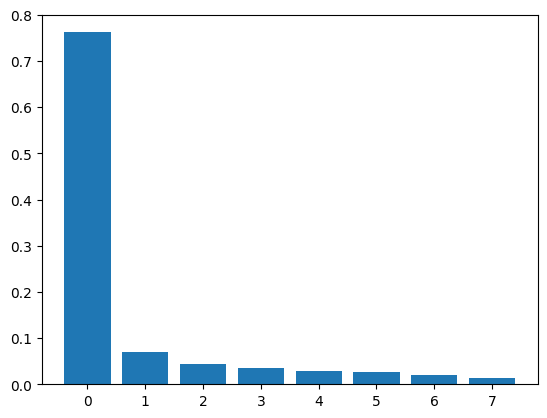

1 0.7620853256568665  ---------  0.001 10 1 SOLID 71.10619438428202


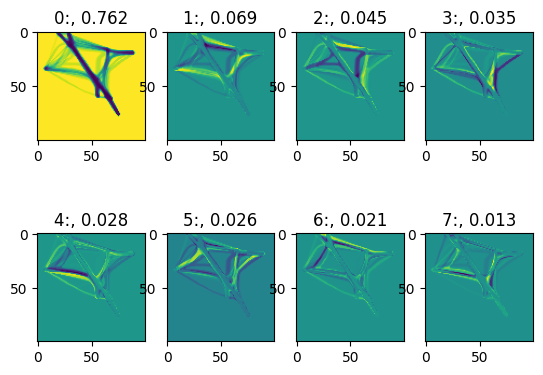

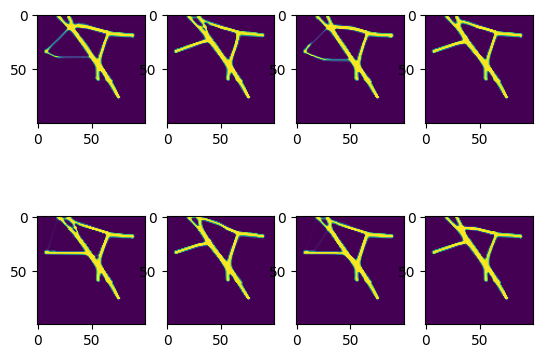

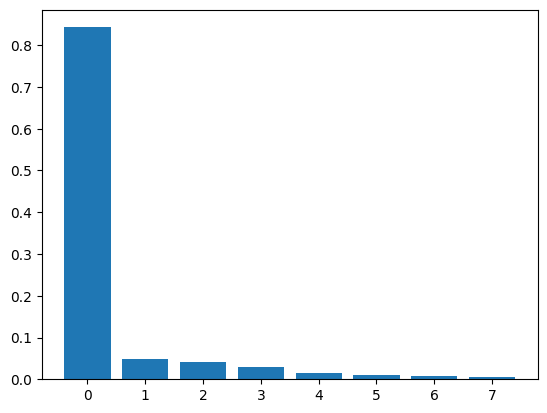

2 0.8429656504938745  ---------  0.0002 10 1 SOLID 70.66456986136576


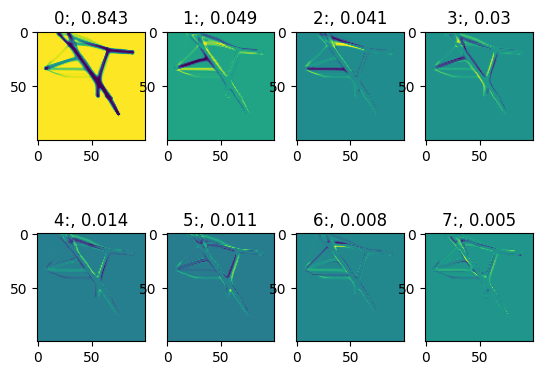

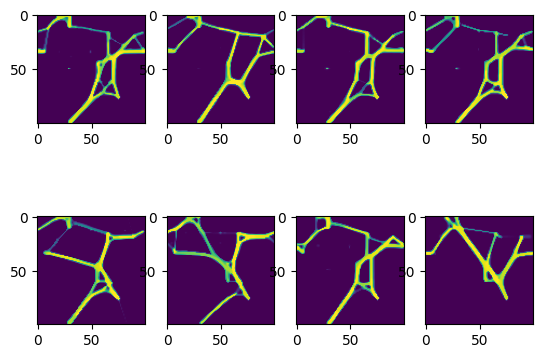

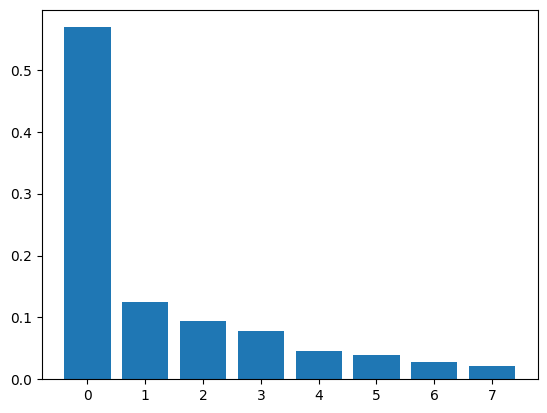

3 0.5689374592582078  ---------  0.002 10 1 PERIODIC 59.728468659603166


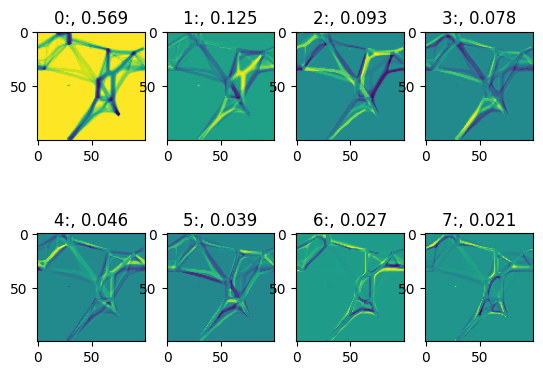

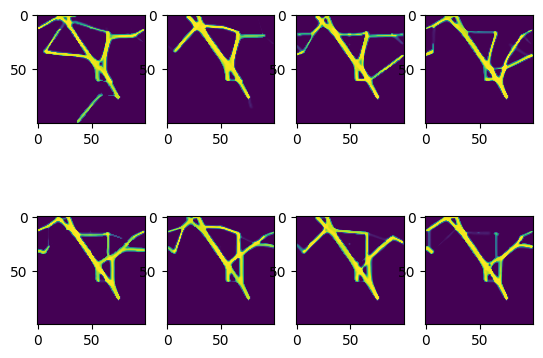

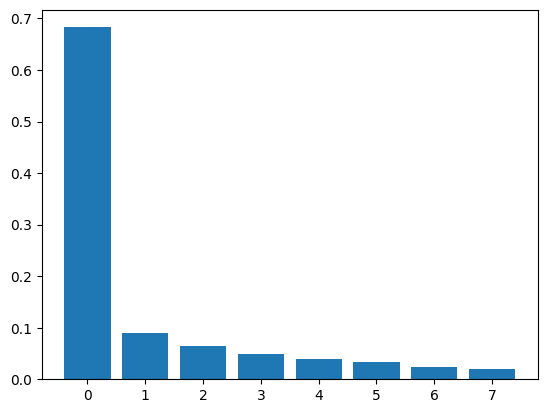

4 0.6828336444191176  ---------  0.001 10 1 PERIODIC 66.95357572204638


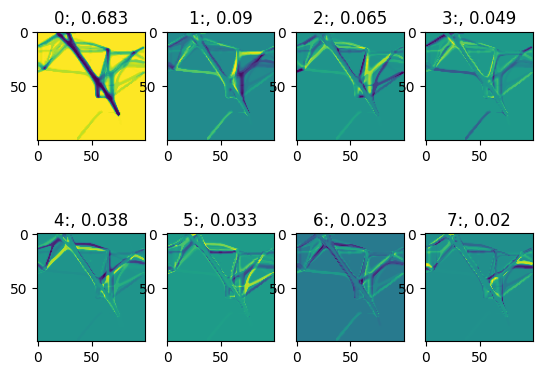

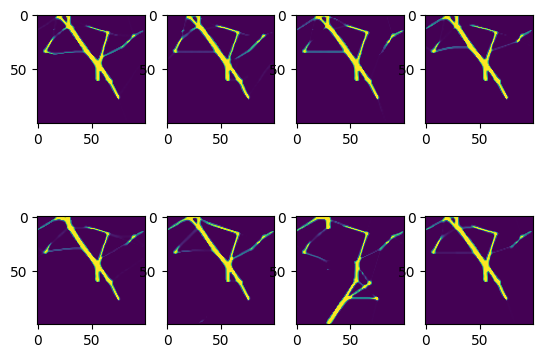

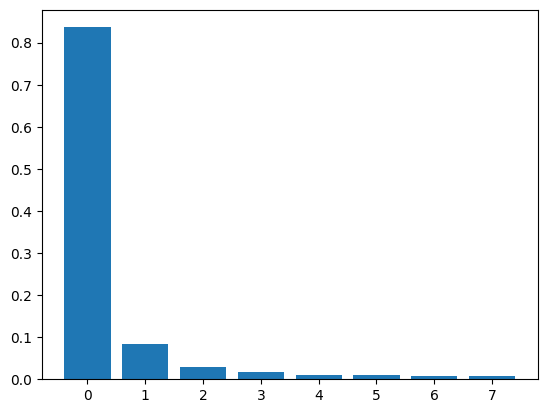

5 0.8364393814698168  ---------  0.0002 10 1 PERIODIC 59.625695295605105


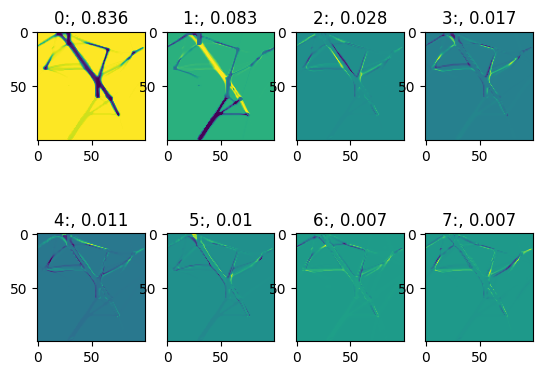

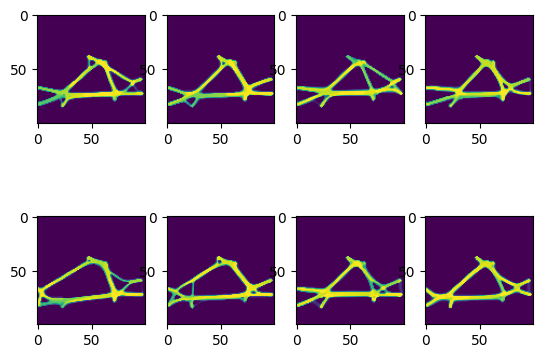

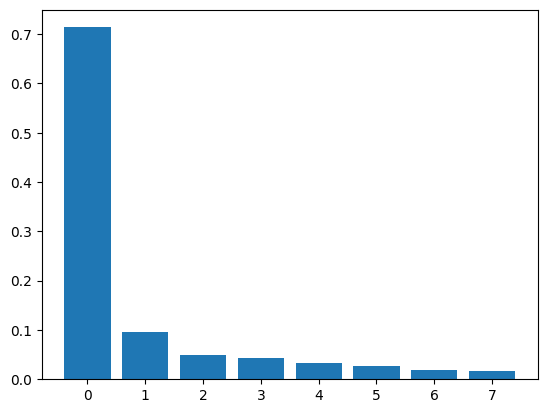

6 0.7137886546680573  ---------  0.002 10 2 SOLID 67.77365713091508


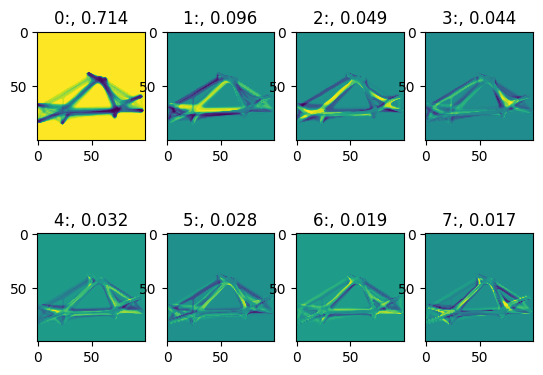

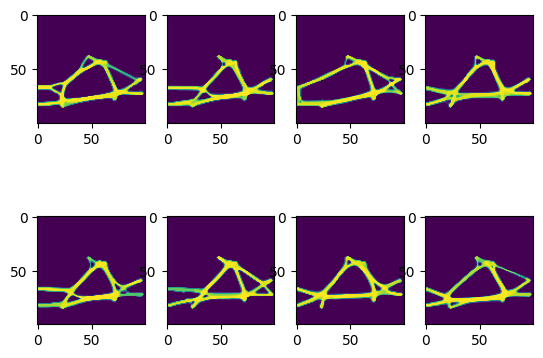

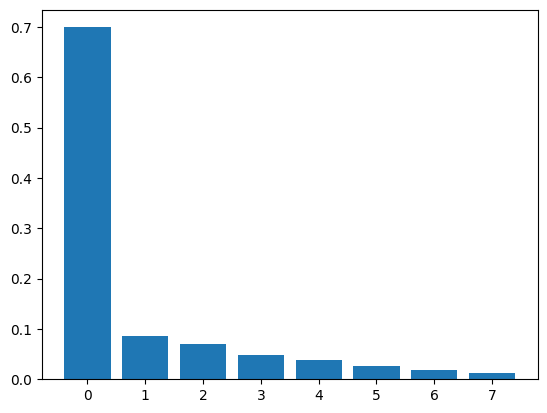

7 0.6991021770697854  ---------  0.001 10 2 SOLID 70.27082218006959


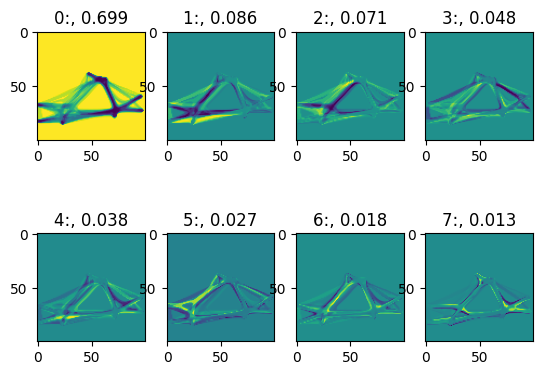

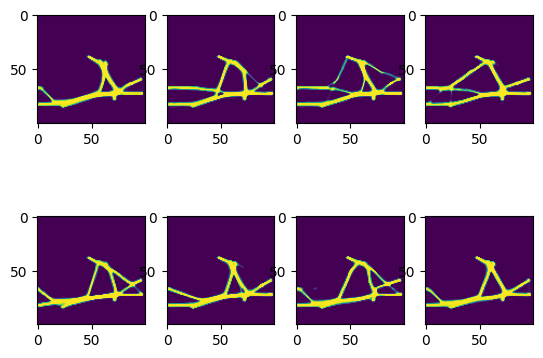

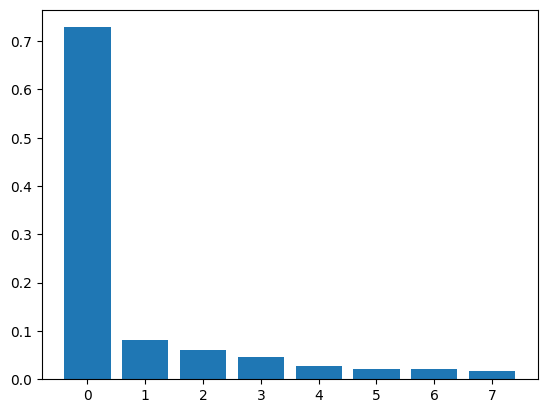

8 0.7286588768886201  ---------  0.0002 10 2 SOLID 66.62545648042247


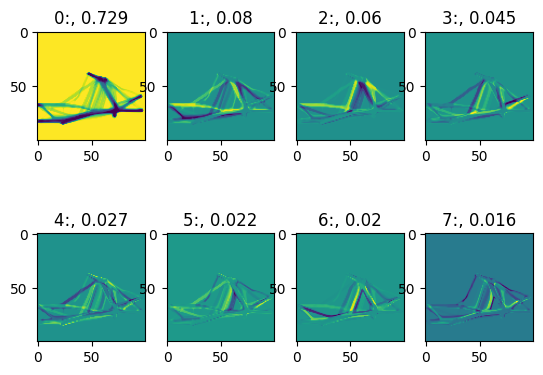

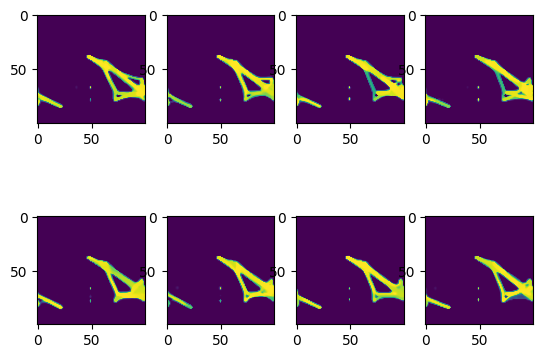

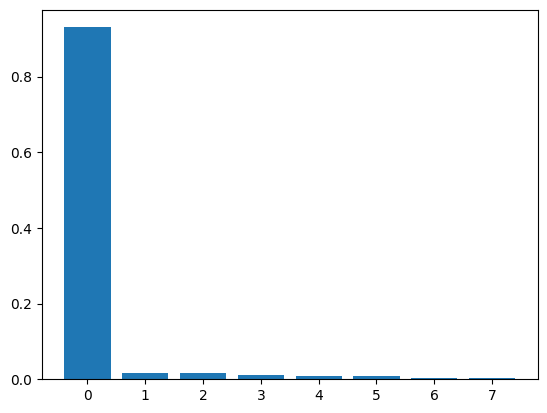

9 0.930471126109495  ---------  0.002 10 2 PERIODIC 70.34984913467679


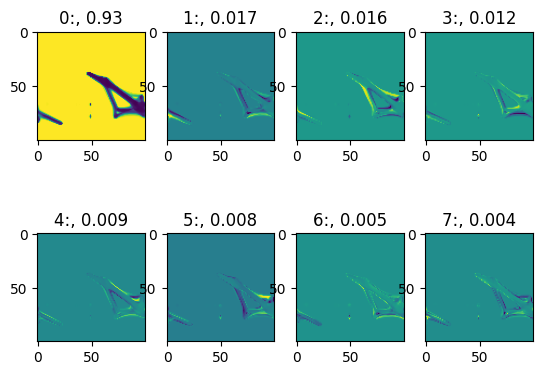

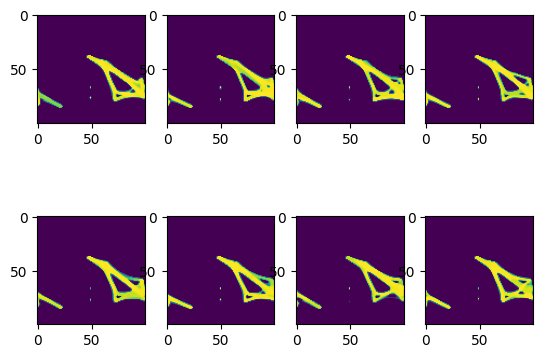

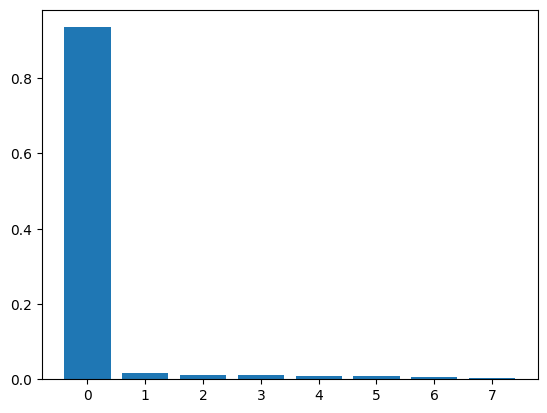

10 0.9353145728214738  ---------  0.001 10 2 PERIODIC 74.75289839976625


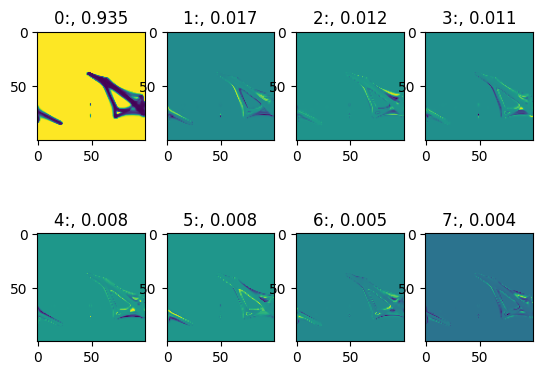

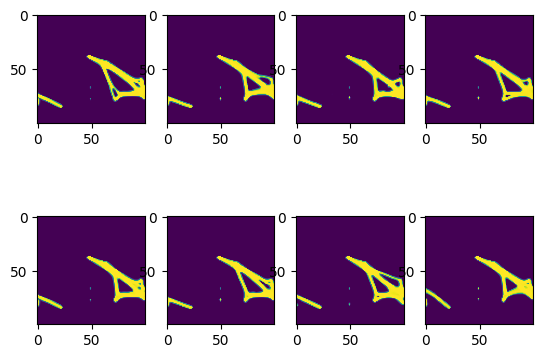

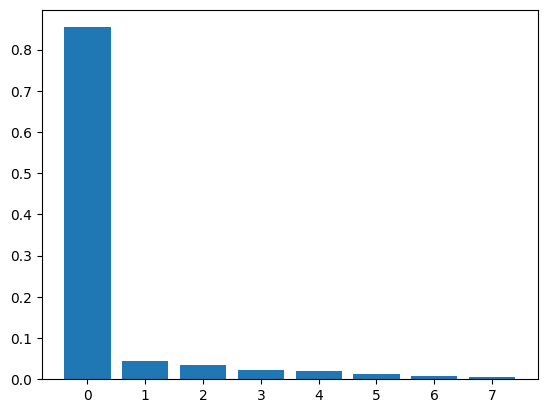

11 0.8539415761553765  ---------  0.0002 10 2 PERIODIC 68.4140970162631


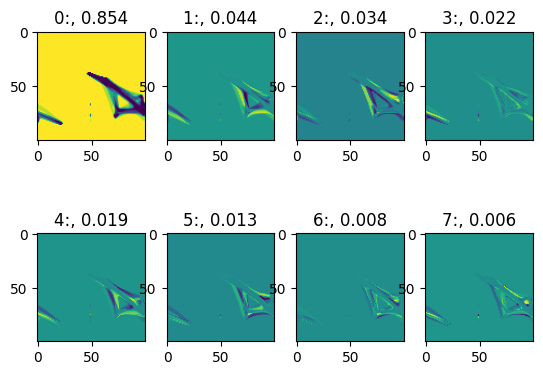

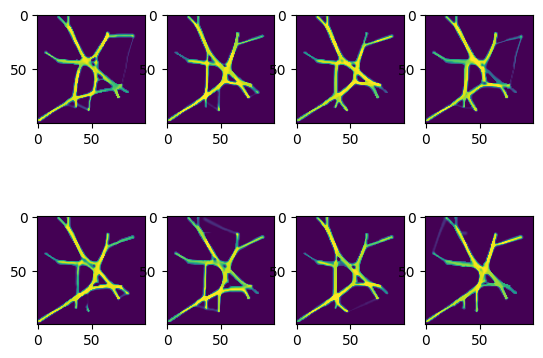

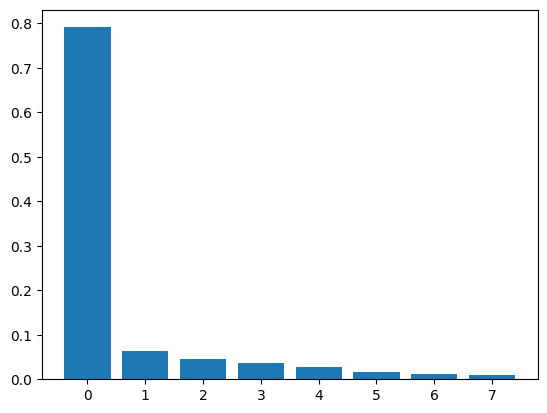

12 0.7908300676563987  ---------  0.002 20 1 SOLID 71.39477481674216


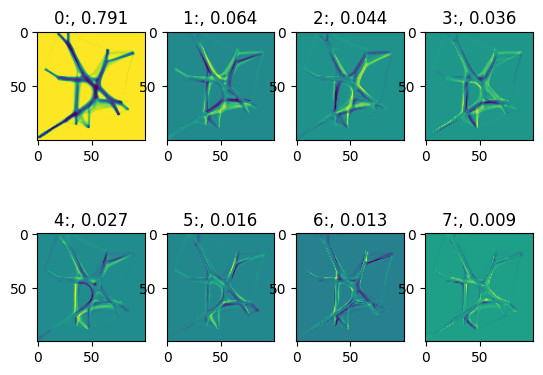

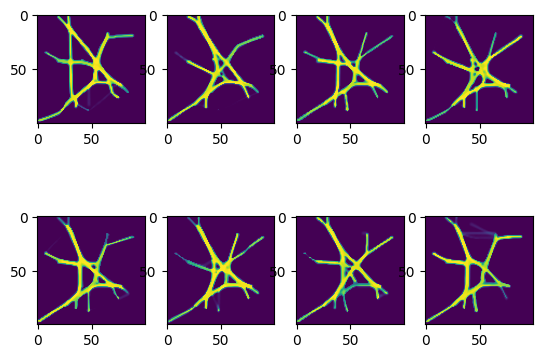

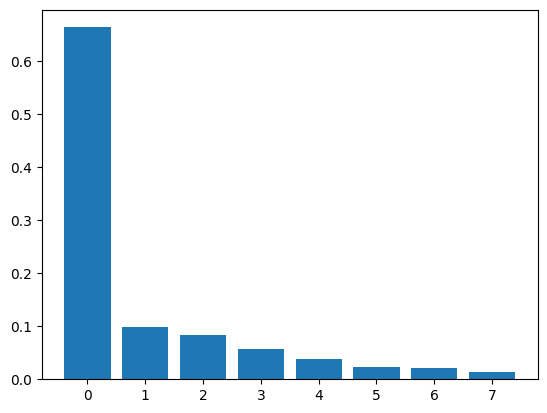

13 0.6645121177654916  ---------  0.001 20 1 SOLID 67.67762123955254


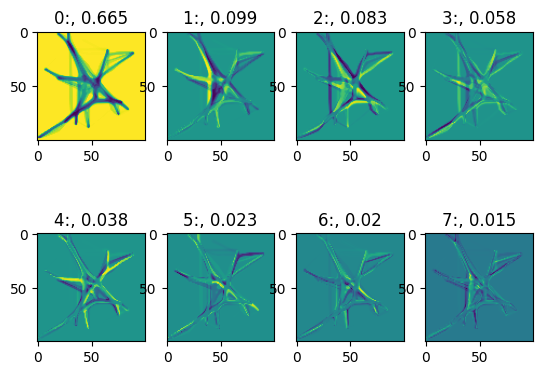

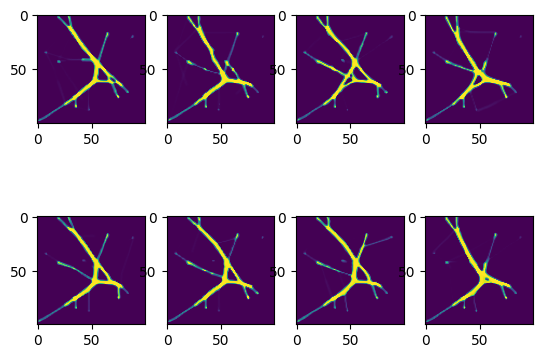

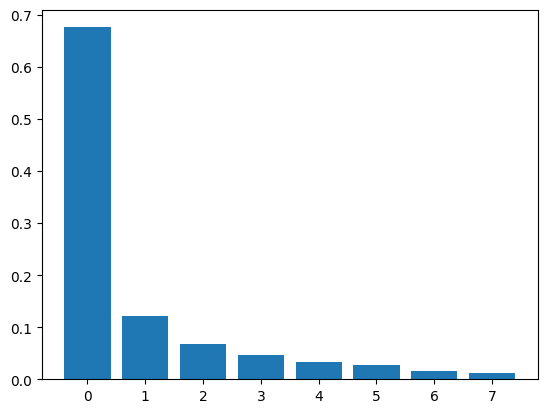

14 0.675581106328379  ---------  0.0002 20 1 SOLID 53.200848209758824


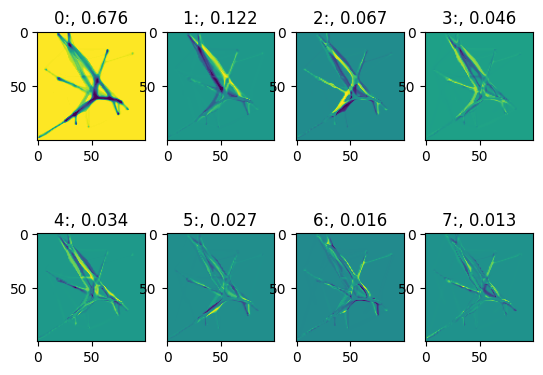

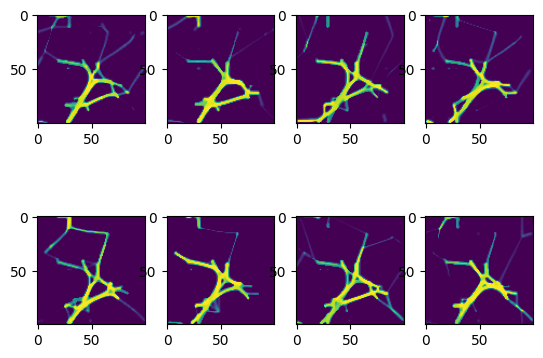

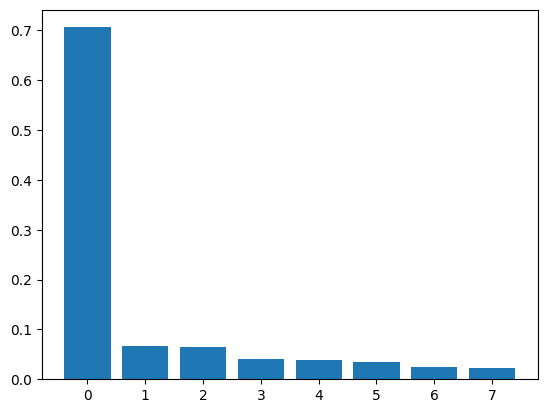

15 0.7061982752328295  ---------  0.002 20 1 PERIODIC 60.57995867578055


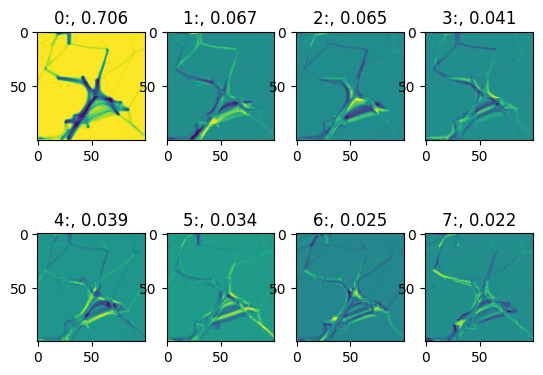

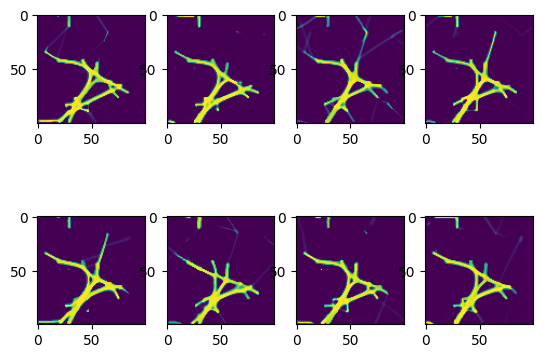

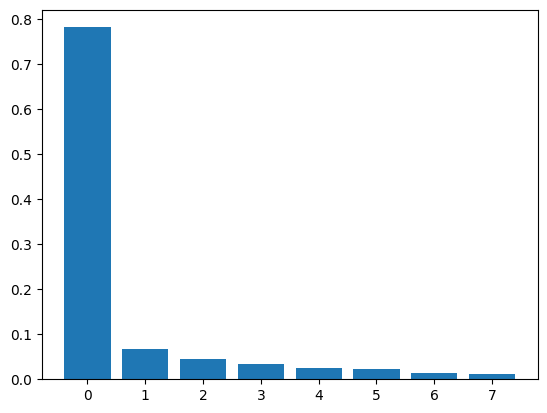

16 0.7819913784954208  ---------  0.001 20 1 PERIODIC 68.16112523178971


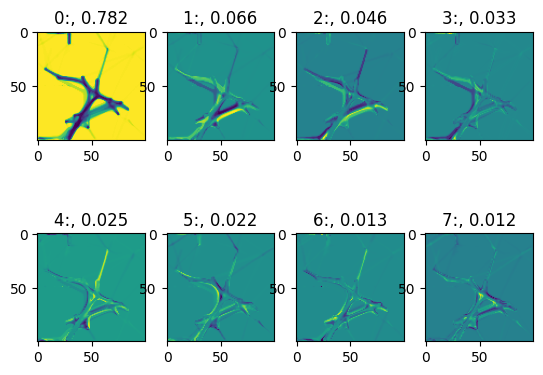

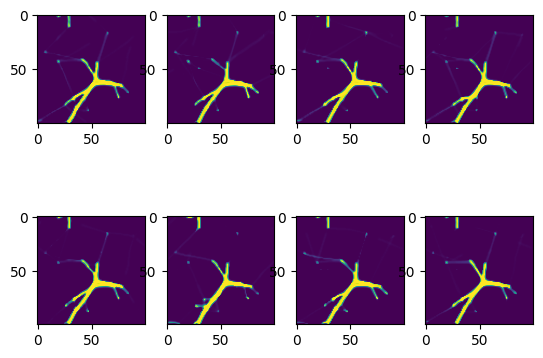

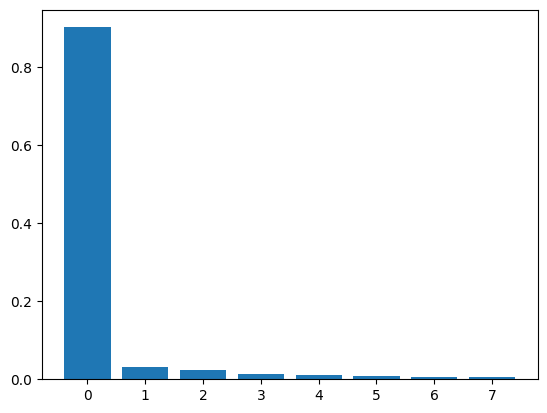

17 0.9019437896042038  ---------  0.0002 20 1 PERIODIC 54.8372828019373


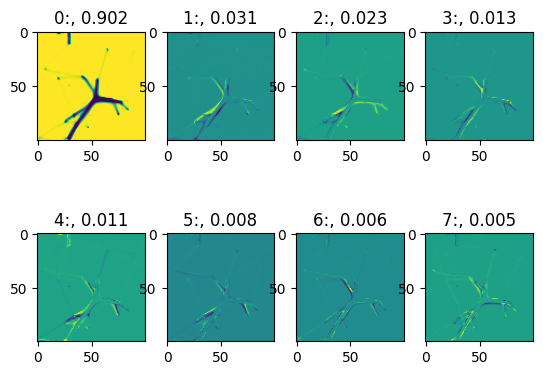

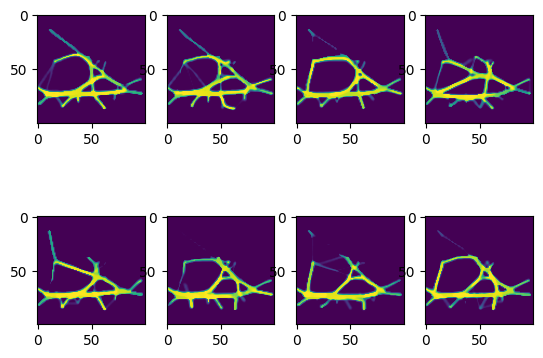

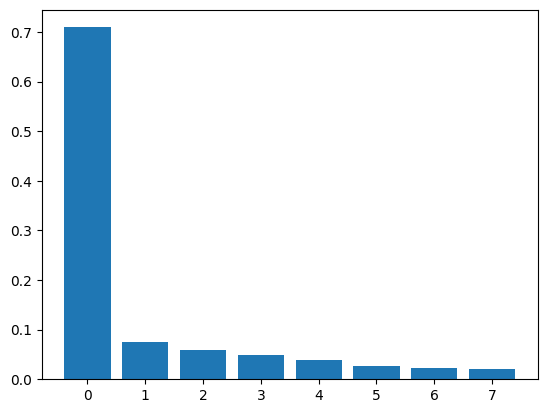

18 0.7093533550984993  ---------  0.002 20 2 SOLID 66.12028114468409


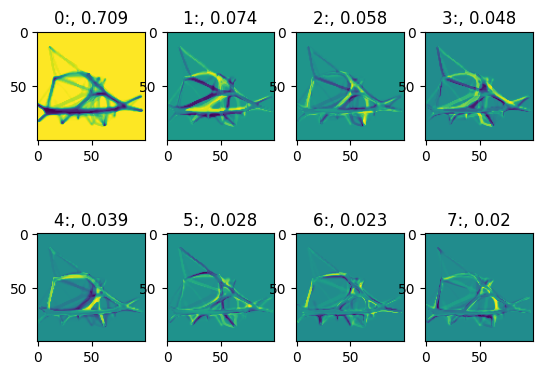

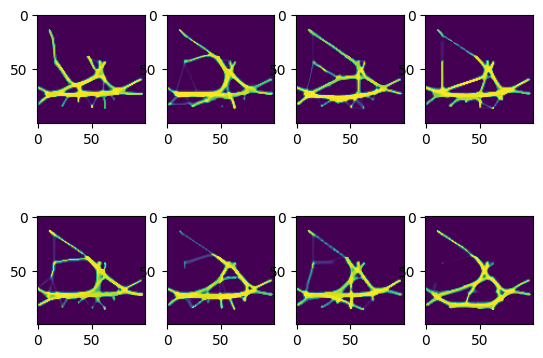

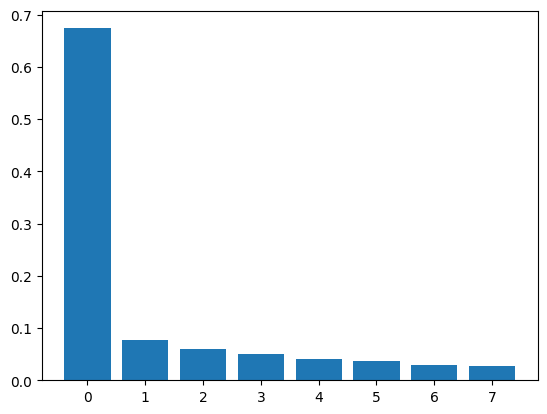

19 0.6741346553763352  ---------  0.001 20 2 SOLID 67.42670243565883


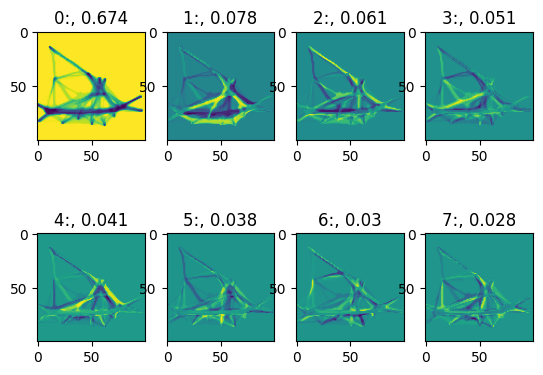

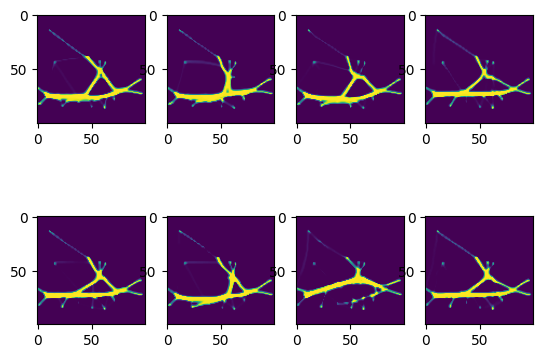

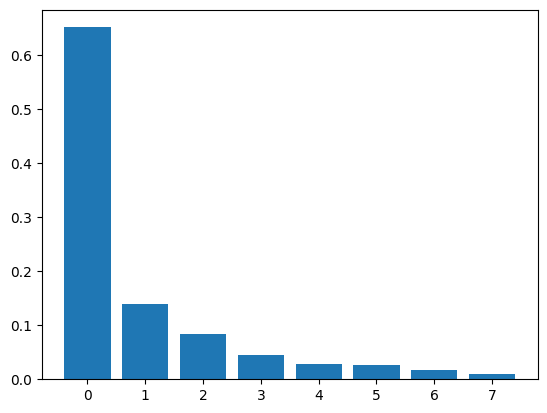

20 0.6519689275305012  ---------  0.0002 20 2 SOLID 55.09356118516524


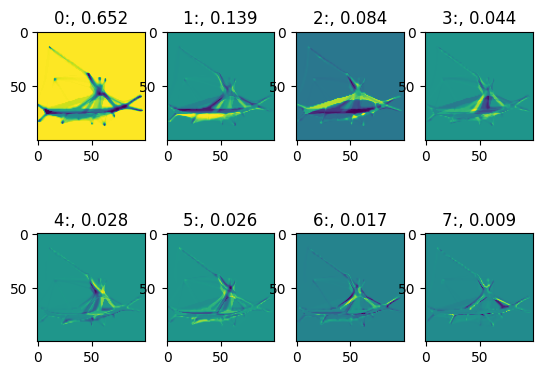

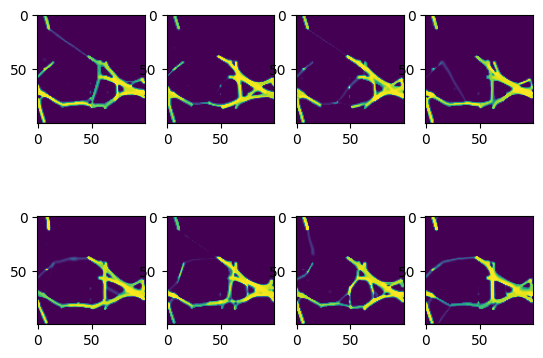

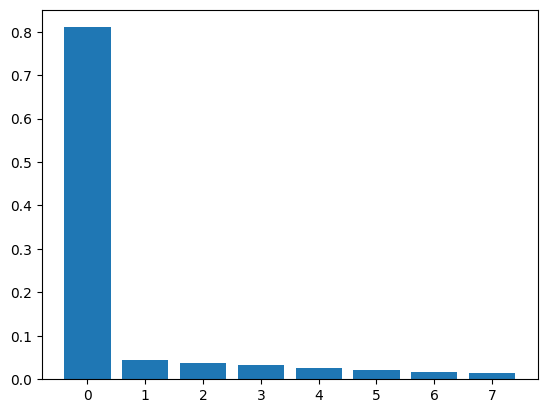

21 0.8101489247584878  ---------  0.002 20 2 PERIODIC 70.08309102400985


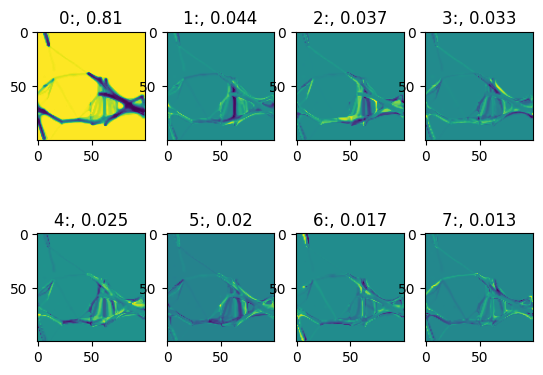

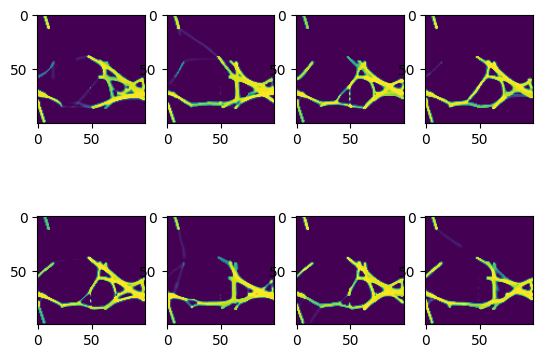

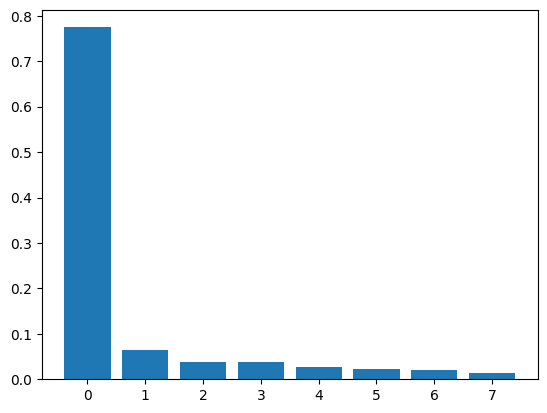

22 0.7746448080812756  ---------  0.001 20 2 PERIODIC 72.61196536960836


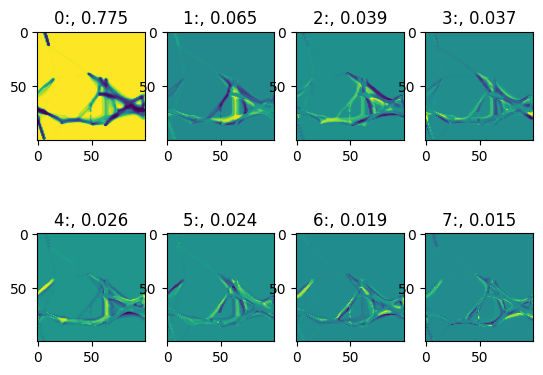

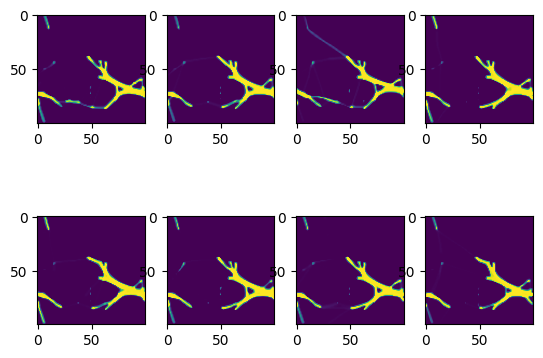

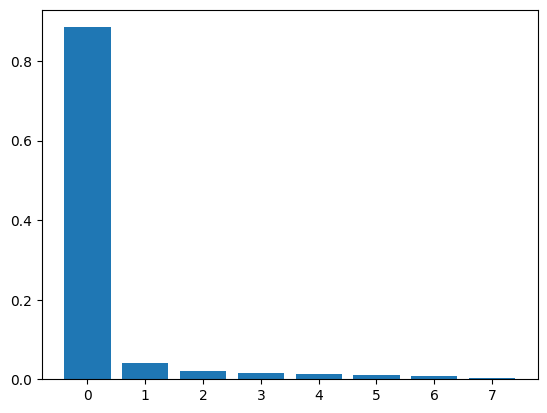

23 0.8847891744794419  ---------  0.0002 20 2 PERIODIC 63.61714170809314


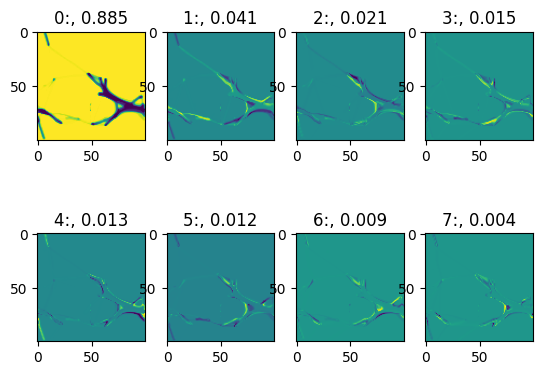

In [43]:
recoveries = [0.002, 0.001, 0.0002]
numLocations = [10, 20]
seedLocations = [1, 2]
boundaryConditions = ["SOLID", "PERIODIC"]
recoveryLogics = ["LINEAR"]

i = 0
for numLocation in numLocations:
    for seedLocation in seedLocations:
        for boundaryCondition in boundaryConditions:
            for recovery in recoveries:
                for recoveryLogic in patchRecoveries:
                    _finals = df[
                        (df["steps"] == 10000) &
                        (df["settings.patchRecovery"] == recovery) &
                        # (df["ratio"] == 100.0) &
                        (df["settings.numLocations"] == numLocation) &
                        (df["settings.randomSeedLocations"] == seedLocation) &
                        (df["settings.boundaryConditions"] == boundaryCondition) &
                        (df["settings.recoveryLogic"] == recoveryLogic)
                    ]
                    util.plot_patches(_finals)
                    U, S, Vh = util.svd(_finals, plot=True)
                    s = S**2/sum(S**2)
    
                    print(i, s[0], " --------- ", recovery, numLocation, seedLocation, boundaryCondition, S[0])
                    i += 1


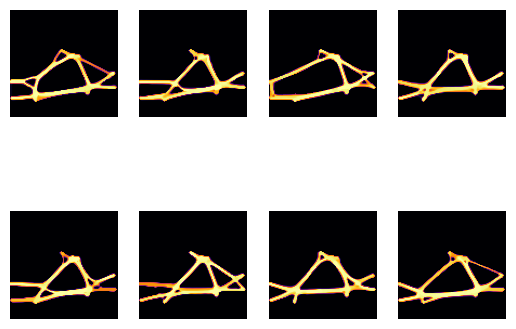

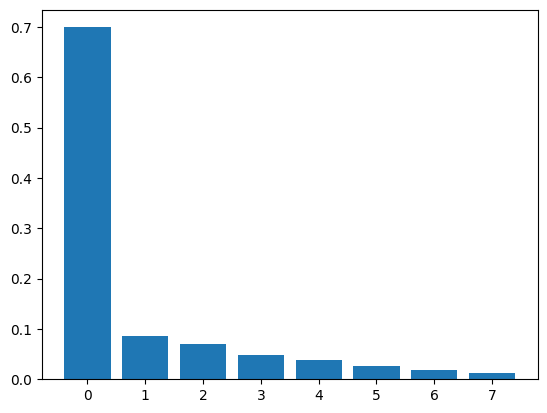

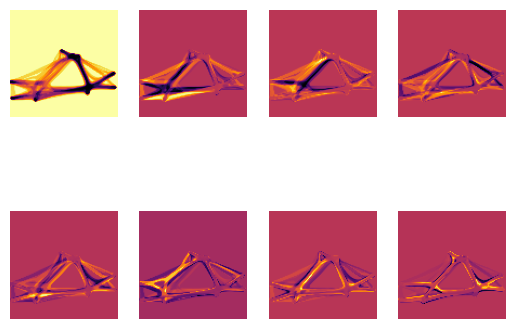

In [5]:
_finals = df[
    (df["settings.patchRecovery"] == 0.001) &
    # (df["ratio"] == 100.0) &
    (df["settings.numLocations"] == 10) &
    (df["settings.randomSeedLocations"] == 2) &
    (df["settings.boundaryConditions"] == "SOLID") &
    (df["settings.recoveryLogic"] == "LINEAR") &
    (df["steps"] == 10000)
]

util.plot_patches(_finals)
util.svd(_finals);

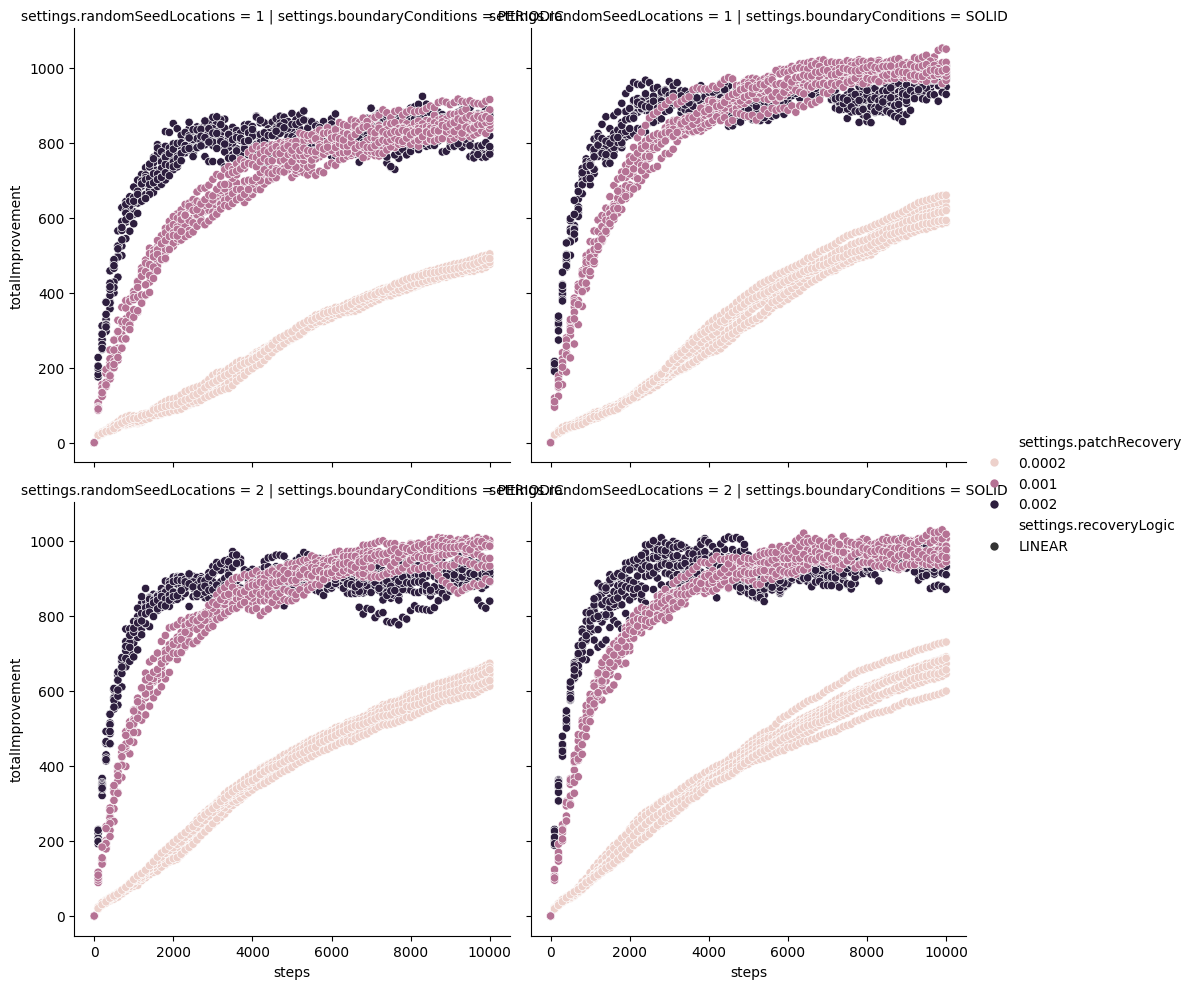

In [44]:
sns.relplot(data=df[df["settings.numLocations"] == 20],
            x="steps",
            y="totalImprovement",
            style="settings.recoveryLogic",
            hue="settings.patchRecovery",
            col="settings.boundaryConditions",
            row="settings.randomSeedLocations"
)

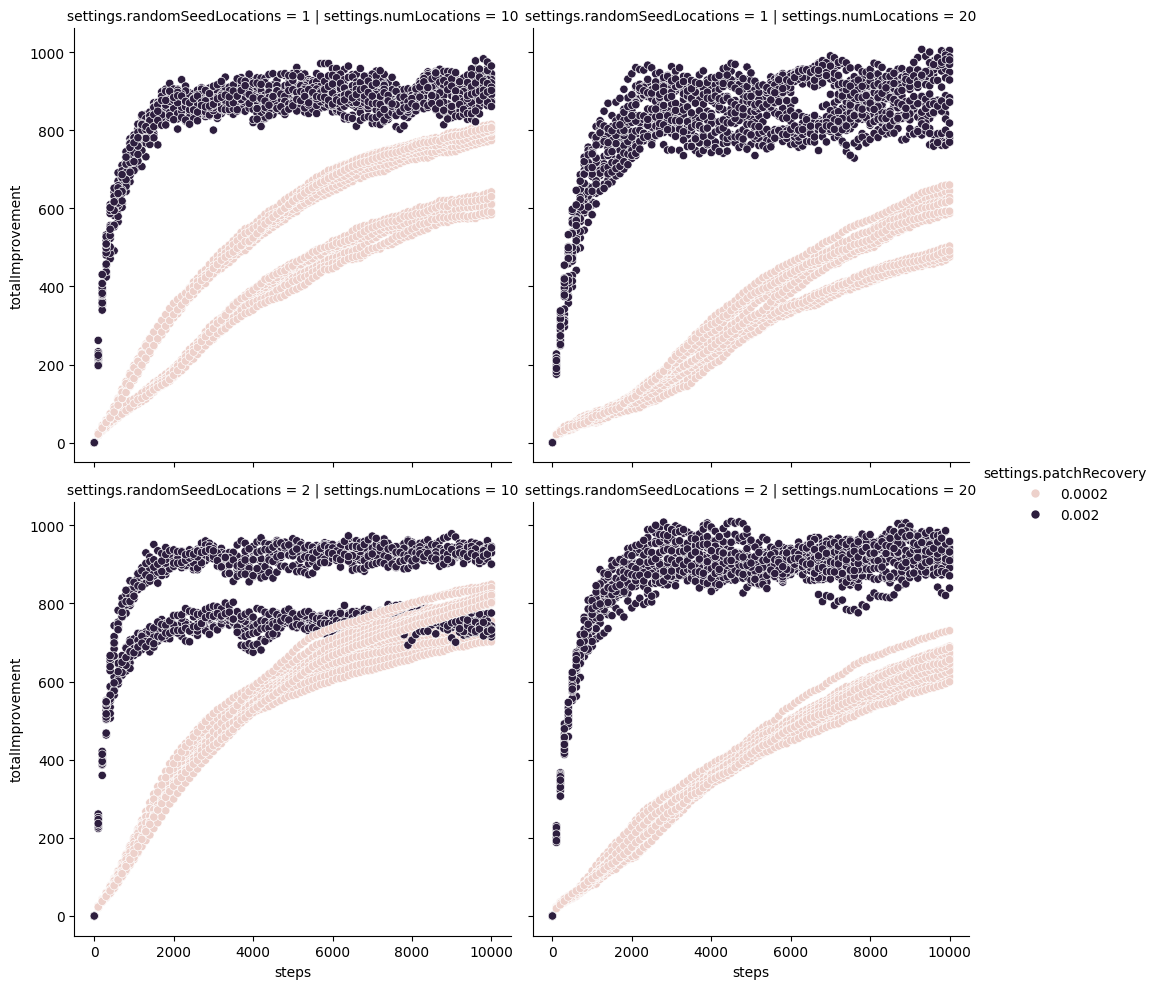

In [179]:
sns.relplot(data=df,
            x="steps",
            y="totalImprovement",
            hue="settings.patchRecovery",
            col="settings.numLocations",
            row="settings.randomSeedLocations"
)